# EXCEED Prolific Study: Finding the Fantastic Four - Prolific Sampling

Within this notebook, we will analyze the results of our pilot study where we asked participants to go over 8 different Python buggy code snippets, and their associated standard interpreter error messages, and provide ratings on a 1-5 scale for several statements, namely:
- "_This code snippet is difficult to understand._"
- "_I would find it challenging to resolve the issue in this code snippet._"
- "_Reading this error message feels mentally demanding._"
- "_This error message is useful for identifying the problem._"

The goal of this analysis isn't to necessarily find a "best" or "worst" error message (and code snippet), but rather to identify the four Python code snippets and their associated error messages that we will later use within the actual main Prolific study. We will refer to these as the "Fantastic Four".

In this notebook we will analyze the results of the pilot study to identify the "Fantastic Four" snippets. The data within this section was collected from participants who were recruited via the Prolific platform, meaning that they were randomly selected to participate in the study. This should provide a more representative sample of participants and reduce potential bias in the results. The participants were pre-screened to be fluent in English and have Python programming experience.


## Step 0: Install Required Python Libraries

In [1]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Step 1.1: Load the Data

In [2]:
import pandas as pd

# Set the path to the CSV file which contains the results of the pilot study (Prolific sampling)
file_path = "../data/pilot_study_prolific_results.csv"

# Load the data into a DataFrame
df = pd.read_csv(file_path)

## Step 1.2: Remove Columns with Prolific ID & Python YoE

In this step, we will remove the columns that contain the Prolific ID and the Python years of experience (YoE) from the DataFrame, and basically separate the data into two parts: the ratings and the demographic information. This will help us focus on the ratings for the analysis while keeping the demographic information separate.

In [3]:
demographic_columns = ['Prolific ID', 'Python YoE']
demographic_attention_check_columns = ['Prolific ID', 'Python YoE', 'Attention Check']

# Extract only the demographic columns into a new DataFrame
demographics_df = df[demographic_attention_check_columns].copy()

# Display the first few rows of the demographics DataFrame
print("Demographics DataFrame:")
display(demographics_df)

# Remove demographic columns from the DataFrame
ratings_df = df.drop(columns=demographic_columns)

# Display the first few rows of the ratings DataFrame
print("Ratings DataFrame (first 5 rows):")
ratings_df.head()

Demographics DataFrame:


,Prolific ID,Python YoE,Attention Check
0,1,3,5
1,2,3,5
2,3,2,5
3,4,3,5
4,5,1,5
5,6,15,5
6,7,6,1


Ratings DataFrame (first 5 rows):


,Timestamp,This code snippet is difficult to understand.,I would find it challenging to resolve the issue in this code snippet.,Reading this error message feels mentally demanding.,This error message is useful for identifying the problem.,This code snippet is difficult to understand..1,I would find it challenging to resolve the issue in this code snippet..1,Reading this error message feels mentally demanding..1,This error message is useful for identifying the problem..1,This code snippet is difficult to understand..2,...,Reading this error message feels mentally demanding..5,This error message is useful for identifying the problem..5,This code snippet is difficult to understand..6,I would find it challenging to resolve the issue in this code snippet..6,Reading this error message feels mentally demanding..6,This error message is useful for identifying the problem..6,This code snippet is difficult to understand..7,I would find it challenging to resolve the issue in this code snippet..7,Reading this error message feels mentally demanding..7,This error message is useful for identifying the problem..7
0,2025/08/06 11:59:10 am EEST,3,3,4,3,2,2,2,4,3,...,3,4,3,3,3,4,3,3,3,4
1,2025/08/06 12:02:31 pm EEST,3,3,3,4,2,2,2,4,2,...,3,4,2,2,2,4,3,3,3,4
2,2025/08/06 12:11:52 pm EEST,4,4,5,2,2,1,2,5,3,...,3,4,2,2,3,5,4,5,4,2
3,2025/08/06 12:11:57 pm EEST,2,1,1,5,1,1,1,5,1,...,1,5,2,2,3,3,4,4,4,2
4,2025/08/06 12:22:54 pm EEST,2,2,2,4,2,2,2,4,3,...,2,5,4,4,1,5,1,1,1,5


## Step 1.3: Analyze the Demographics Data

In [4]:
# Mean and standard deviation of Python YoE without excluding people who did not pass the attention check

print ("Demographics Analysis Before Attention Check Filtering:")
print ("-------------------------------------------------------")

num_participants_before = len(demographics_df)
print(f"Number of participants before filtering for attention check: {num_participants_before}")

mean_python_yoe = demographics_df['Python YoE'].mean()
std_python_yoe = demographics_df['Python YoE'].std()

print(f"Mean Python YoE: {mean_python_yoe:.2f} years")
print(f"Standard Deviation of Python YoE: {std_python_yoe:.2f} years")

# Minimum and maximum Python YoE
print(f"Minimum Python YoE: {demographics_df['Python YoE'].min()} years")
print(f"Maximum Python YoE: {demographics_df['Python YoE'].max()} years")

# Exclude row where attention check failed (5 means strongly agree for the attention check)
# The demographics_df has a column 'Attention Check' which we can use to filter the DataFrame
print ("\nDemographics Analysis After Attention Check Filtering:")
print ("-------------------------------------------------------")

attention_check_col = demographics_df['Attention Check']

# Filter rows only where attention check is passed (5 means strongly agree)
filtered_demographics_df = demographics_df[attention_check_col == 5]
num_participants_after = len(filtered_demographics_df)
print(f"Number of participants after filtering for attention check: {num_participants_after}")

mean_python_yoe_filtered = filtered_demographics_df['Python YoE'].mean()
std_python_yoe_filtered = filtered_demographics_df['Python YoE'].std()
print(f"Mean Python YoE (after filtering): {mean_python_yoe_filtered:.2f} years")
print(f"Standard Deviation of Python YoE (after filtering): {std_python_yoe_filtered:.2f} years")

# Minimum and maximum Python YoE after filtering
print(f"Minimum Python YoE (after filtering): {filtered_demographics_df['Python YoE'].min()} years")
print(f"Maximum Python YoE (after filtering): {filtered_demographics_df['Python YoE'].max()} years")


Demographics Analysis Before Attention Check Filtering:
-------------------------------------------------------
Number of participants before filtering for attention check: 7
Mean Python YoE: 4.71 years
Standard Deviation of Python YoE: 4.79 years
Minimum Python YoE: 1 years
Maximum Python YoE: 15 years

Demographics Analysis After Attention Check Filtering:
-------------------------------------------------------
Number of participants after filtering for attention check: 6
Mean Python YoE (after filtering): 4.50 years
Standard Deviation of Python YoE (after filtering): 5.21 years
Minimum Python YoE (after filtering): 1 years
Maximum Python YoE (after filtering): 15 years


## Step 2: Keep Only Rows with Attention Check Passed

In [5]:
# Define the column indices for each snippet
snippet_columns = {
    'snippet_1': list(range(1, 5)),
    'snippet_2': list(range(5, 9)),
    'snippet_3': list(range(9, 13)),
    'snippet_4': list(range(13, 18)),  # includes attention check
    'snippet_5': list(range(18, 22)),
    'snippet_6': list(range(22, 26)),
    'snippet_7': list(range(26, 30)),
    'snippet_8': list(range(30, 34)),
}

# Remove rows where the attention check failed (attention check column should be at index 16)
attention_check_col = ratings_df.columns[16]  # Get the actual column name at index 16

# Number of participants in the study before filtering
num_participants_before = len(ratings_df)
print(f"Number of participants before filtering for attention check: {num_participants_before}")

# Filter rows only where attention check is passed (5 means strongly agree)
filtered_df = ratings_df[ratings_df[attention_check_col] == 5]

# Number of participants in the study after filtering for attention check
num_participants_after = len(filtered_df)
print(f"Number of participants after filtering for attention check: {num_participants_after}")

# Adjust snippet_columns for snippet_4 to exclude the attention check column
snippet_columns_adjusted = snippet_columns.copy()
snippet_columns_adjusted['snippet_4'] = [13, 14, 15, 17]  # Exclude the attention check column (index 16)

# Extract questions and results for each snippet
snippets = {}
for key, cols in snippet_columns_adjusted.items():
    col_names = filtered_df.columns[cols]
    snippets[key] = filtered_df[col_names]


Number of participants before filtering for attention check: 7
Number of participants after filtering for attention check: 6


## Step 3: Analyze the Data

In this step we will perform the following analyses:
1. Calculate the average ratings for each snippet for each question.
2. Rank the snippets based on their average ratings for each question.
3. Plot the average ratings for each snippet for each question.

## Step 3.1: Calculate Average Ratings for Each Snippet For Each Question

In this step, we will calculate the average ratings for each question across all snippets. This will help us understand how participants rated each snippet in terms of difficulty, challenge, mental demand, and usefulness of the error message. We will plot a bar chart for each question showing the average ratings for all snippets.

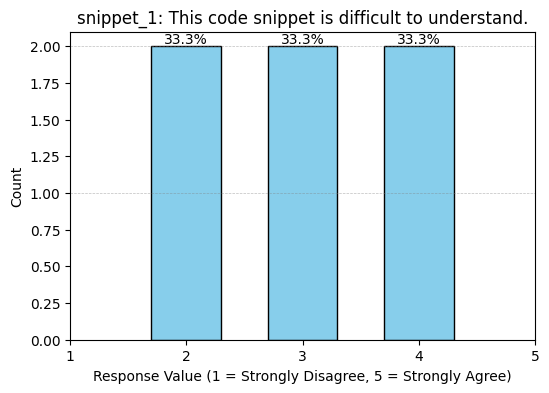

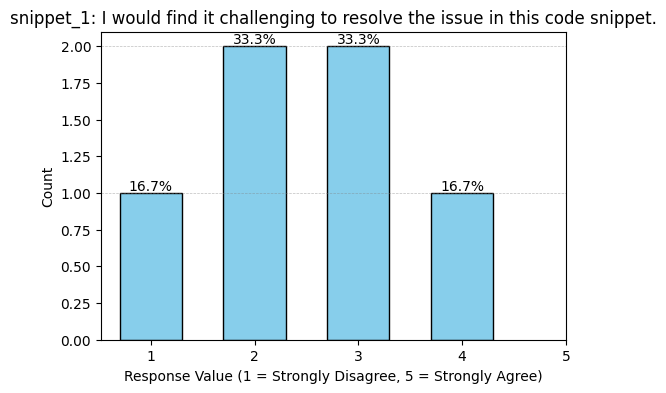

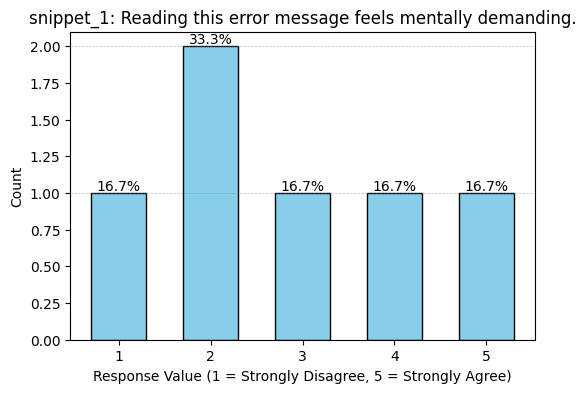

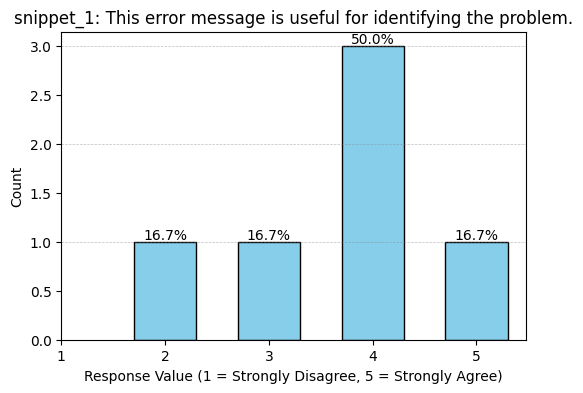

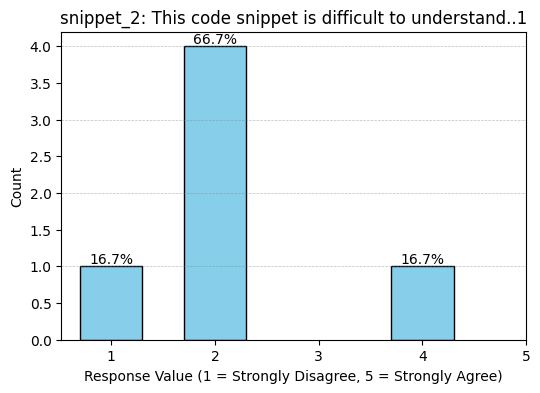

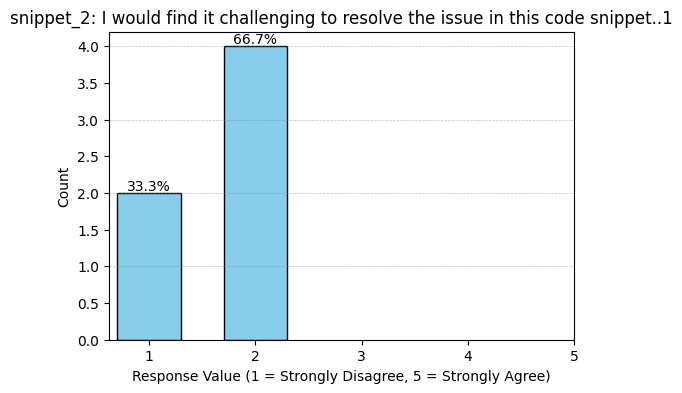

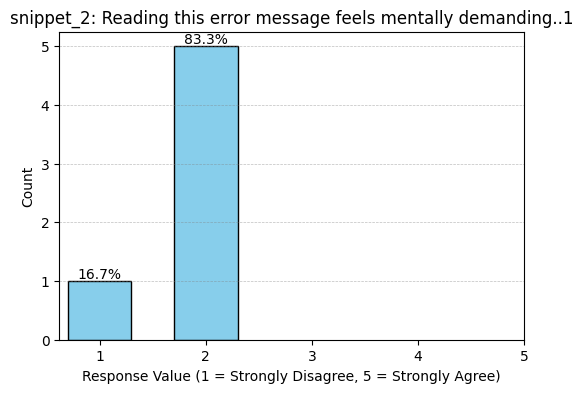

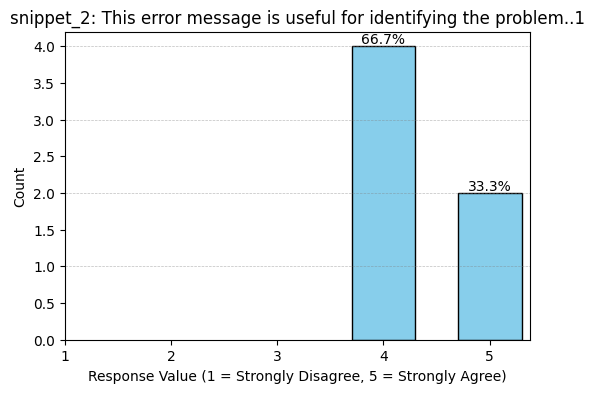

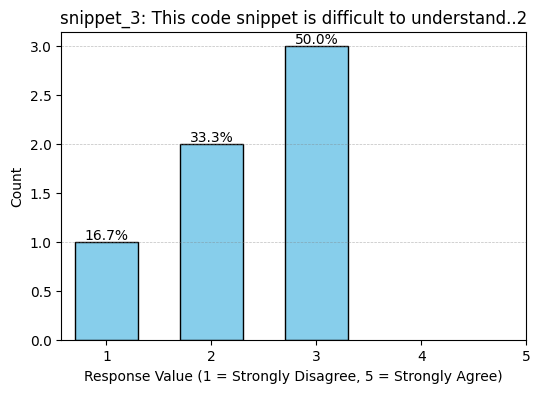

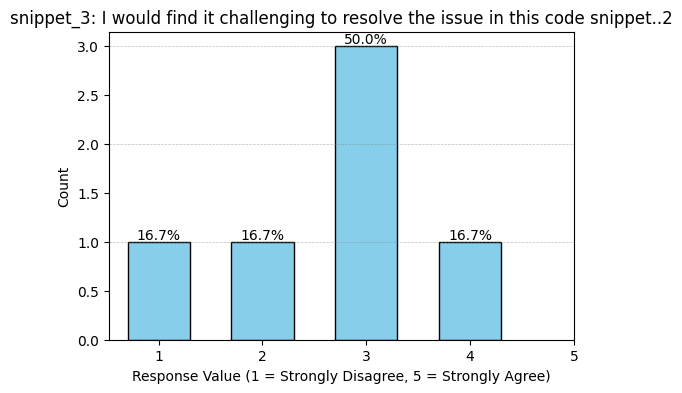

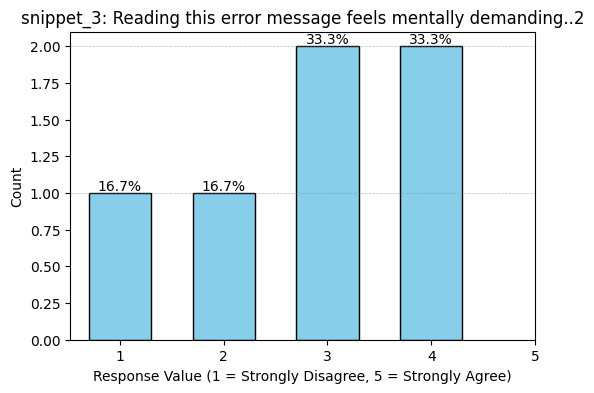

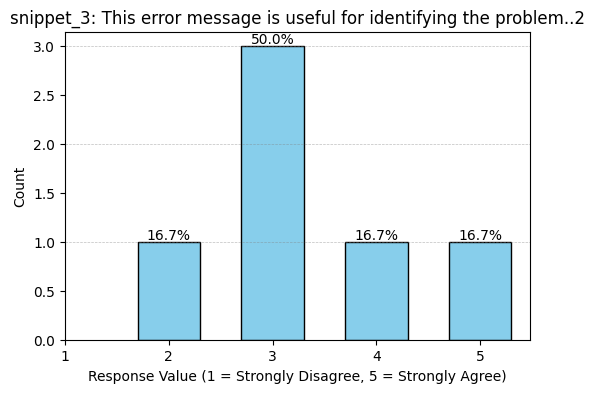

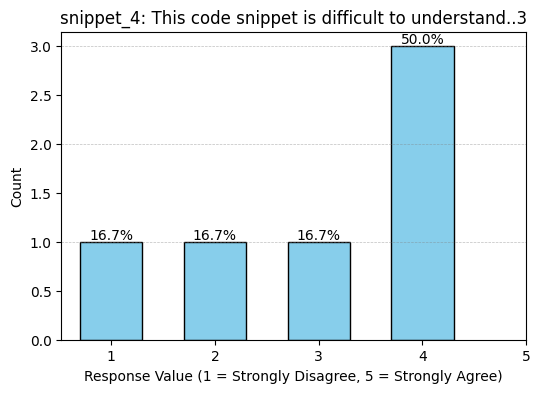

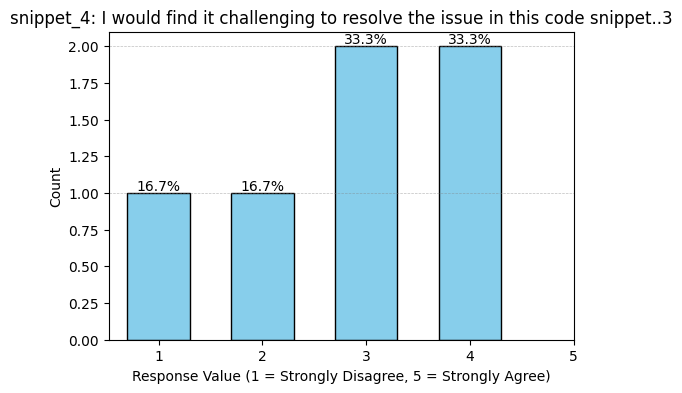

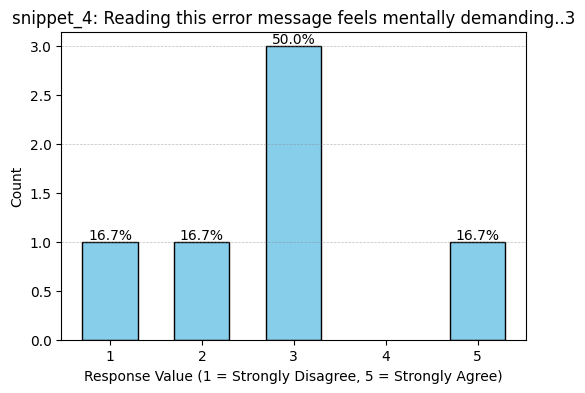

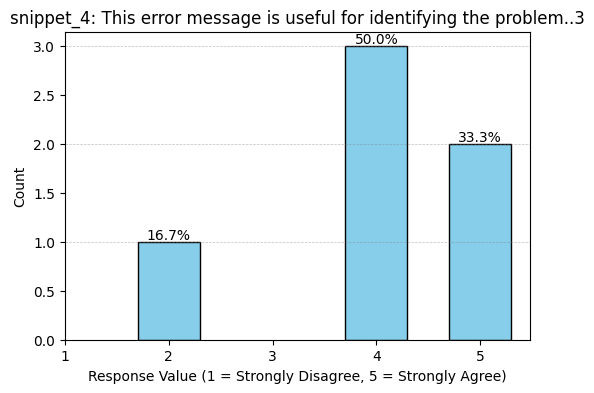

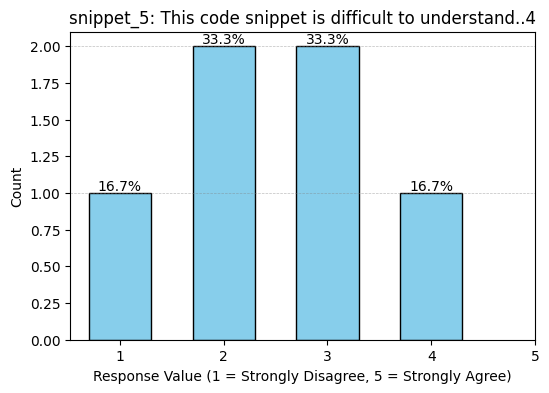

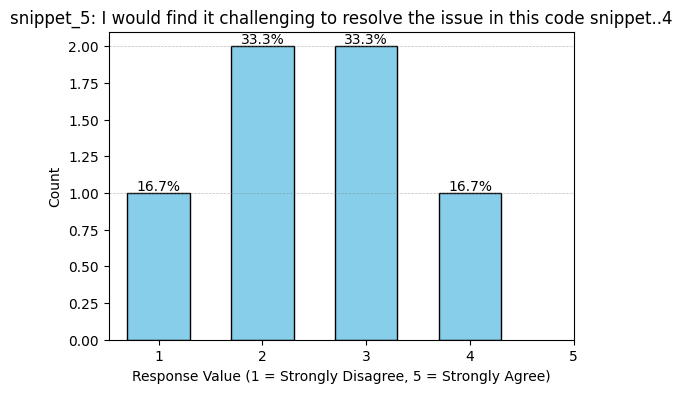

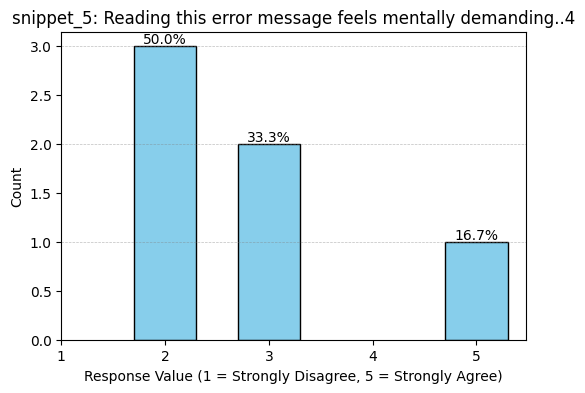

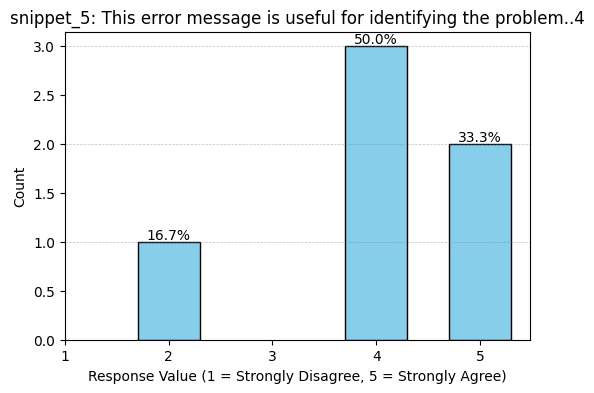

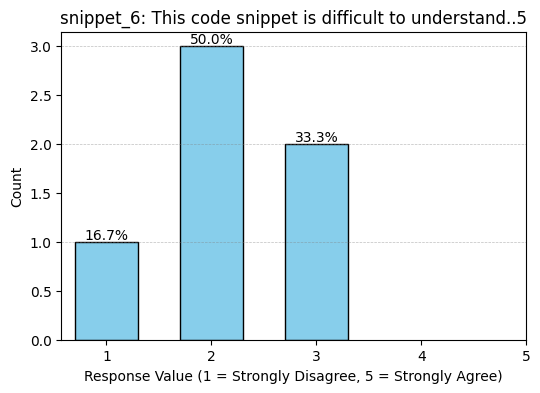

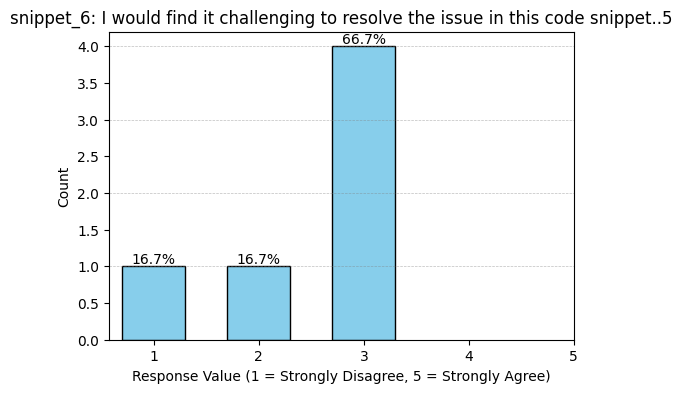

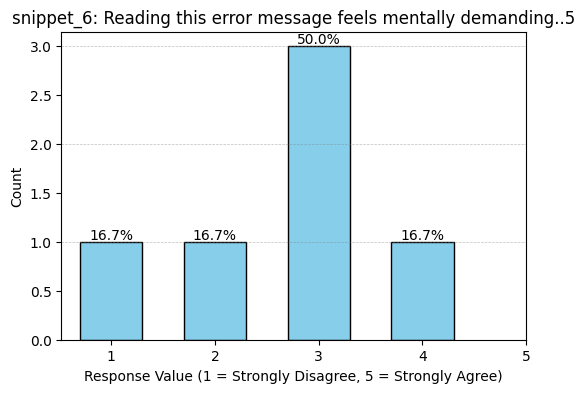

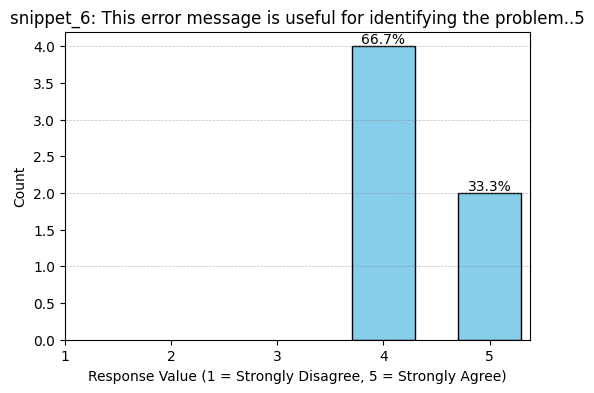

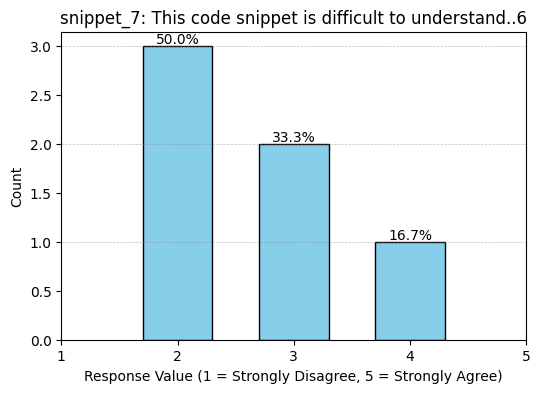

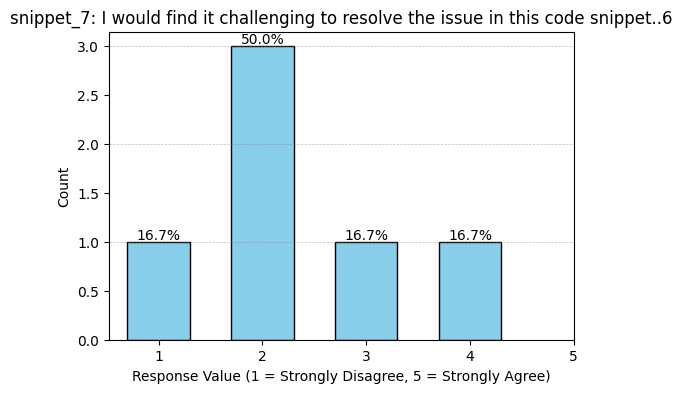

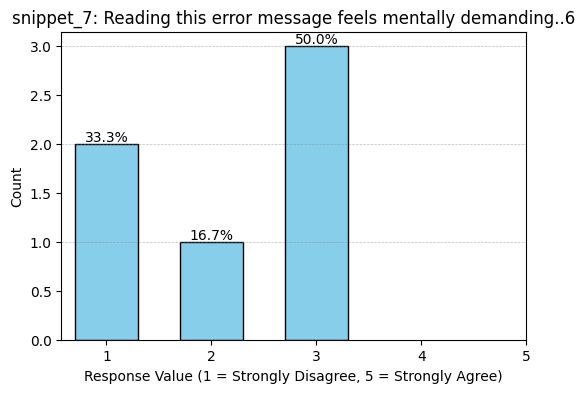

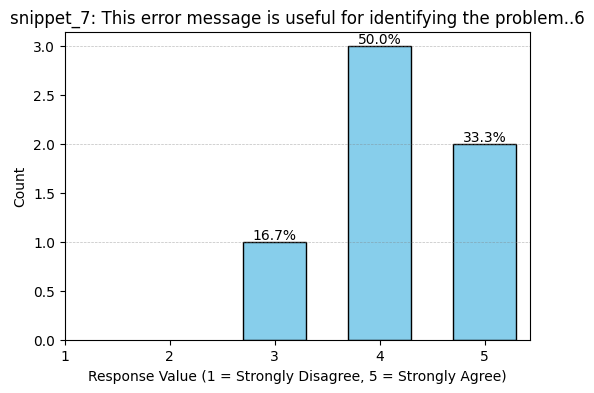

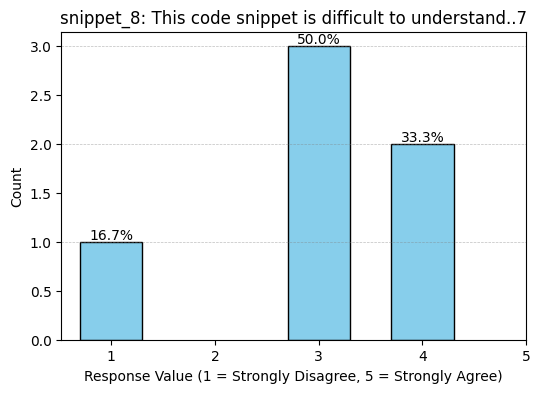

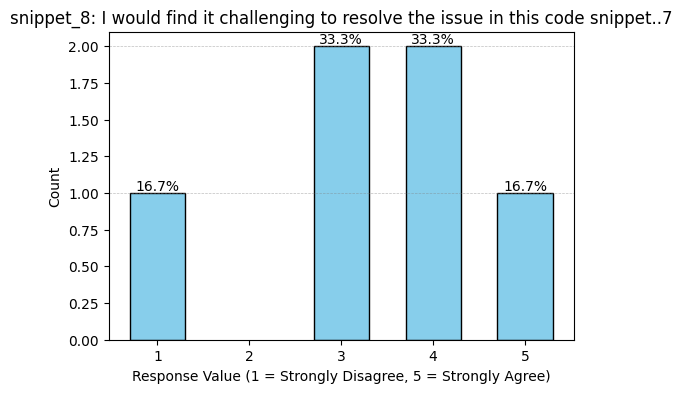

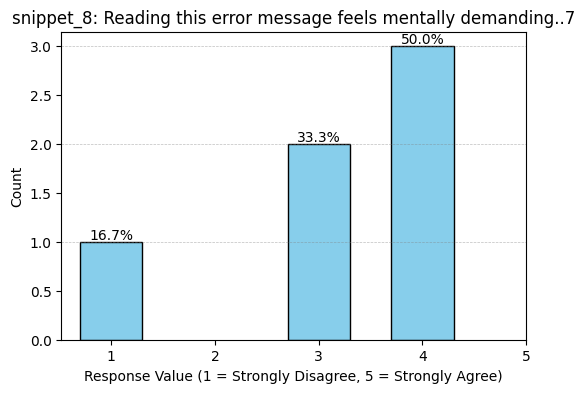

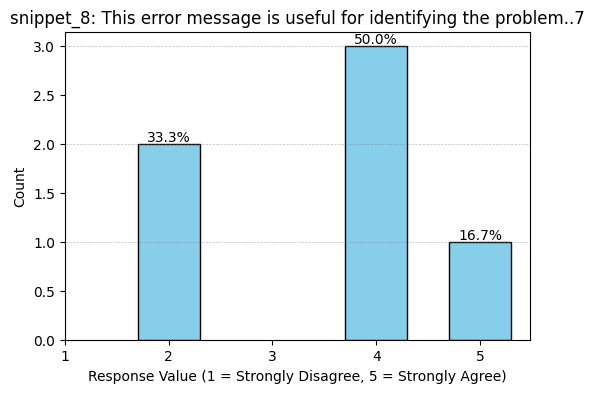

In [6]:
import matplotlib.pyplot as plt

# Plot histograms for each snippet and each question, with percentages on each bar
for snippet_name, snippet_df in snippets.items():
    for col in snippet_df.columns:
        plt.figure(figsize=(6, 4))
        data = snippet_df[col].dropna().astype(int)
        counts = data.value_counts().sort_index()
        total = counts.sum()
        bars = plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black', align='center', width=0.6)
        plt.title(f"{snippet_name}: {col}")
        plt.xlabel("Response Value (1 = Strongly Disagree, 5 = Strongly Agree)")
        plt.ylabel("Count")
        plt.xticks(range(1, 6))

        # Annotate each bar with percentage
        for bar in bars:
            height = bar.get_height()
            percent = f"{height / total * 100:.1f}%"
            plt.text(bar.get_x() + bar.get_width() / 2, height, percent, ha='center', va='bottom', fontsize=10)

        # Add horizontal lines for each integer value on the y-axis
        y_min, y_max = plt.gca().get_ylim()
        for y in range(int(y_min), int(y_max) + 1):
            plt.axhline(y, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

        plt.show()


## Step 3.2: Rank Snippets Based on Average Ratings

In this step, we will calculate the average ratings for each snippet across all questions. We will then rank the snippets based on these average ratings to identify the "Fantastic Four" snippets that we will use in the main Prolific study.

In [7]:
# Step 3.2: Calculate mean rating for each question for each code+error snippet, displaying each question only once
question_names = snippets['snippet_1'].columns[:4]
mean_ratings = {q: [] for q in question_names}
snippet_labels = []
for snippet_name, snippet_df in snippets.items():
    snippet_labels.append(snippet_name)
    for i, q in enumerate(question_names):
        mean_ratings[q].append(pd.to_numeric(snippet_df.iloc[:, i], errors='coerce').dropna().mean())
mean_ratings_df = pd.DataFrame(mean_ratings, index=snippet_labels)
mean_ratings_df.index.name = 'Snippet'
mean_ratings_df.columns.name = 'Question'

print("Mean Ratings for Each Question (columns) and Each Snippet (rows):")
print(mean_ratings_df)

Mean Ratings for Each Question (columns) and Each Snippet (rows):
Question   This code snippet is difficult to understand.  \
Snippet                                                    
snippet_1                                       3.000000   
snippet_2                                       2.166667   
snippet_3                                       2.333333   
snippet_4                                       3.000000   
snippet_5                                       2.500000   
snippet_6                                       2.166667   
snippet_7                                       2.666667   
snippet_8                                       3.000000   

Question   I would find it challenging to resolve the issue in this code snippet.  \
Snippet                                                                             
snippet_1                                           2.500000                        
snippet_2                                           1.666667                  

## Step 3.3: Rank Snippets Based on Mean Ratings

In [8]:
# Step 3.3: For each question, print the snippets ordered ascendingly by their mean rating
for question in mean_ratings_df.columns:
    print(f"\nRanking for question: {question}")
    ranked_snippets = mean_ratings_df[question].sort_values(ascending=True)
    print(ranked_snippets)


Ranking for question: This code snippet is difficult to understand.
Snippet
snippet_2    2.166667
snippet_6    2.166667
snippet_3    2.333333
snippet_5    2.500000
snippet_7    2.666667
snippet_1    3.000000
snippet_4    3.000000
snippet_8    3.000000
Name: This code snippet is difficult to understand., dtype: float64

Ranking for question: I would find it challenging to resolve the issue in this code snippet.
Snippet
snippet_2    1.666667
snippet_7    2.333333
snippet_1    2.500000
snippet_5    2.500000
snippet_6    2.500000
snippet_3    2.666667
snippet_4    2.833333
snippet_8    3.333333
Name: I would find it challenging to resolve the issue in this code snippet., dtype: float64

Ranking for question: Reading this error message feels mentally demanding.
Snippet
snippet_2    1.833333
snippet_7    2.166667
snippet_6    2.666667
snippet_1    2.833333
snippet_3    2.833333
snippet_4    2.833333
snippet_5    2.833333
snippet_8    3.166667
Name: Reading this error message feels mentally 

## Step 3.4: Plot the Mean Ratings for Each Snippet

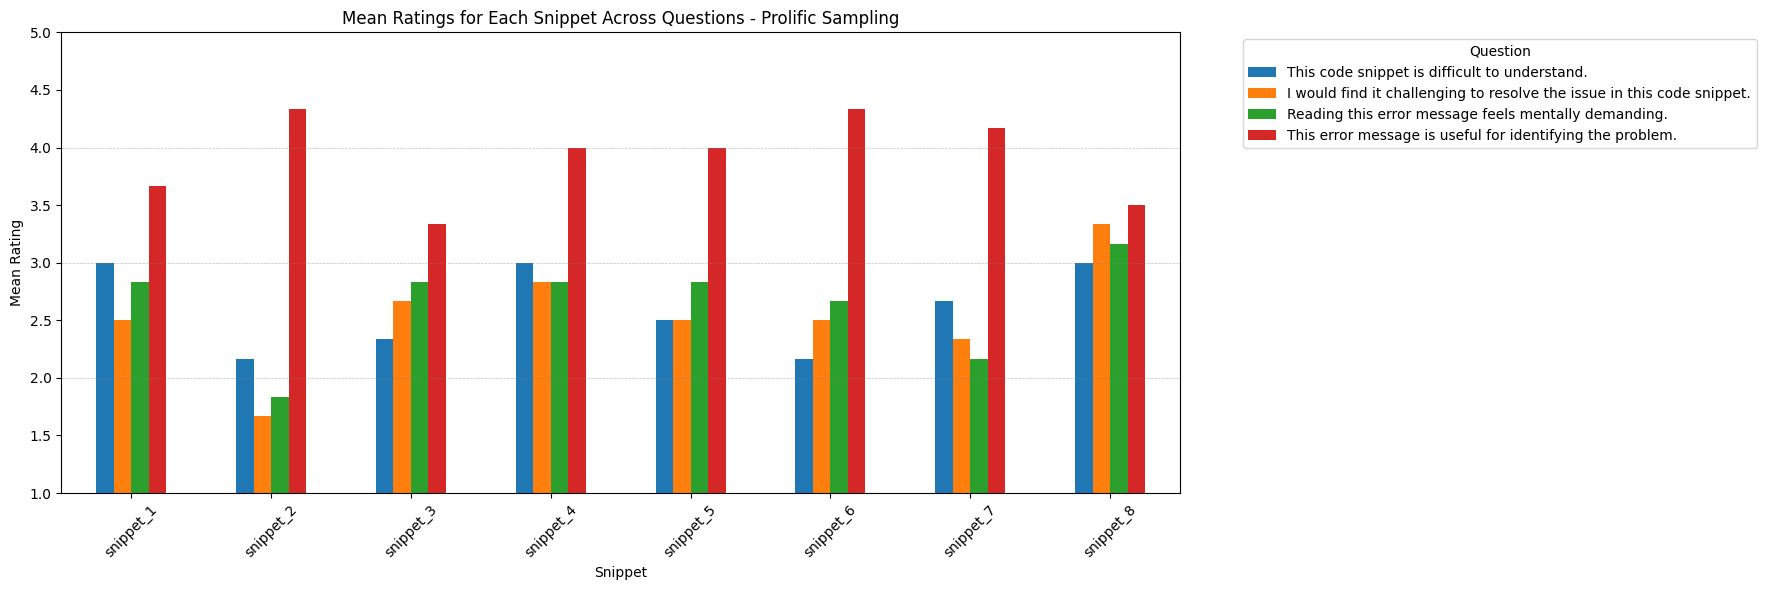

In [9]:
import matplotlib.pyplot as plt

# Plot the mean ratings for each snippet
mean_ratings_df.plot(kind='bar', figsize=(12, 6))
plt.title("Mean Ratings for Each Snippet Across Questions - Prolific Sampling")
plt.xlabel("Snippet")
plt.ylabel("Mean Rating")
plt.ylim(1, 5)
plt.xticks(rotation=45)
plt.tight_layout()

# Place the legend outside the plot
plt.legend(title="Question", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add horizontal lines for each integer value on the y-axis
min_y = int(mean_ratings_df.min().min())
max_y = int(mean_ratings_df.max().max())
for y in range(min_y, max_y + 1):
    plt.axhline(y, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()